# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [65]:
!pip install palmerpenguins

In [97]:
import sklearn
import pandas as pd
from pandas import get_dummies
import numpy as np
from palmerpenguins import load_penguins
from sklearn.linear_model import *
from sklearn.preprocessing import *
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import *
from plotnine import *

#**Dummifying Species, Island, and Gender**


In [67]:
penguins_df = load_penguins()
penguins_df = penguins_df.dropna(subset=['bill_depth_mm']) # Removed inplace=True
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [75]:
#We are using this approch for the dummies.

penguins_df1 = pd.get_dummies(penguins_df)

value_map = ({True:1, False:0})
pd.set_option('future.no_silent_downcasting', True)
penguins_df1 = penguins_df1.replace(value_map).dropna()

penguins_df1.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,2007,1,0,0,0,0,1,0,1


In [ ]:
#encoder approach

catvar = ['species', 'island', 'sex']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

catvar_df = pd.DataFrame(
    encoder.fit_transform(penguins_df[catvar]),
    columns=encoder.get_feature_names_out(catvar),
    index=penguins_df.index
)

numvar_df = penguins_df.select_dtypes(include='number')
penguins_df2 = pd.concat([numvar_df, catvar_df], axis=1)
penguins_df2.head()

In [ ]:
#Note that this would work for gender given it's 2 columns, but the others have advantages because they
#assign a value. The issue you run into here is a category with multiple variables because it's not necessarily
#as simple as assigning a value.

gender_map = ({"male":1,
            "female":0})

species_map = ({"Adelie":0,
            "Chinstrap":1,
            "Gentoo":2})

island_map = ({"Biscoe":0,
            "Dream":1,
            "Torgersen":2})

penguins_df["sex"] = penguins_df["sex"].map(gender_map)
penguins_df["species"] = penguins_df["species"].map(species_map)
penguins_df["island"] = penguins_df["island"].map(island_map)
penguins_df.head()


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [76]:
X = penguins_df1.drop("bill_depth_mm", axis=1)
y = penguins_df1["bill_depth_mm"]

print(X)
print(y)

     bill_length_mm  flipper_length_mm  ...  sex_female  sex_male
0              39.1              181.0  ...           0         1
1              39.5              186.0  ...           1         0
2              40.3              195.0  ...           1         0
4              36.7              193.0  ...           1         0
5              39.3              190.0  ...           0         1
..              ...                ...  ...         ...       ...
339            55.8              207.0  ...           0         1
340            43.5              202.0  ...           1         0
341            49.6              193.0  ...           0         1
342            50.8              210.0  ...           0         1
343            50.2              198.0  ...           1         0

[342 rows x 12 columns]
0      18.7
1      17.4
2      18.0
4      19.3
5      20.6
       ... 
339    19.8
340    18.1
341    18.2
342    19.0
343    18.7
Name: bill_depth_mm, Length: 342, dtype: float64


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

###**Creating the models**

In [84]:
mod1_cols = ["bill_length_mm", "flipper_length_mm", "body_mass_g", "year"]
model1 = LinearRegression().fit(X_train[mod1_cols], y_train)

In [86]:
mod2_cols = ["bill_length_mm", "flipper_length_mm", "body_mass_g", "sex_male", "sex_female"]
model2 = LinearRegression().fit(X_train[mod2_cols], y_train)

In [88]:
mod3_cols = ["bill_length_mm", "flipper_length_mm", "body_mass_g", "island_Dream", "island_Biscoe", "island_Torgersen"]
model3 = LinearRegression().fit(X_train[mod3_cols], y_train)

In [90]:
mod4_cols = ["bill_length_mm", "flipper_length_mm", "body_mass_g", "species_Adelie", "species_Chinstrap", "species_Gentoo"]
model4 = LinearRegression().fit(X_train[mod4_cols], y_train)

In [122]:
models = [
    (model1, mod1_cols),
    (model2, mod2_cols),
    (model3, mod3_cols),
    (model4, mod4_cols),
]

rows = []
for m, cols in models:
    rmse_train = np.sqrt(mean_squared_error(y_train, m.predict(X_train[cols])))
    rmse_test  = np.sqrt(mean_squared_error(y_test,  m.predict(X_test[cols])))
    rows.append((rmse_train, rmse_test))

rmse_df = pd.DataFrame(rows, columns=["rmse_train", "rmse_test"])
rmse_df = rmse_df.rename_axis('model').reset_index()
rmse_df = rmse_df.replace({
    0: 'model1',
    1: 'model2',
    2: 'model3',
    3: 'model4'
})
rmse_df


,model,rmse_train,rmse_test
0,model1,1.536445,1.584606
1,model2,1.116647,1.324834
2,model3,1.408427,1.376090
3,model4,0.832116,0.850471


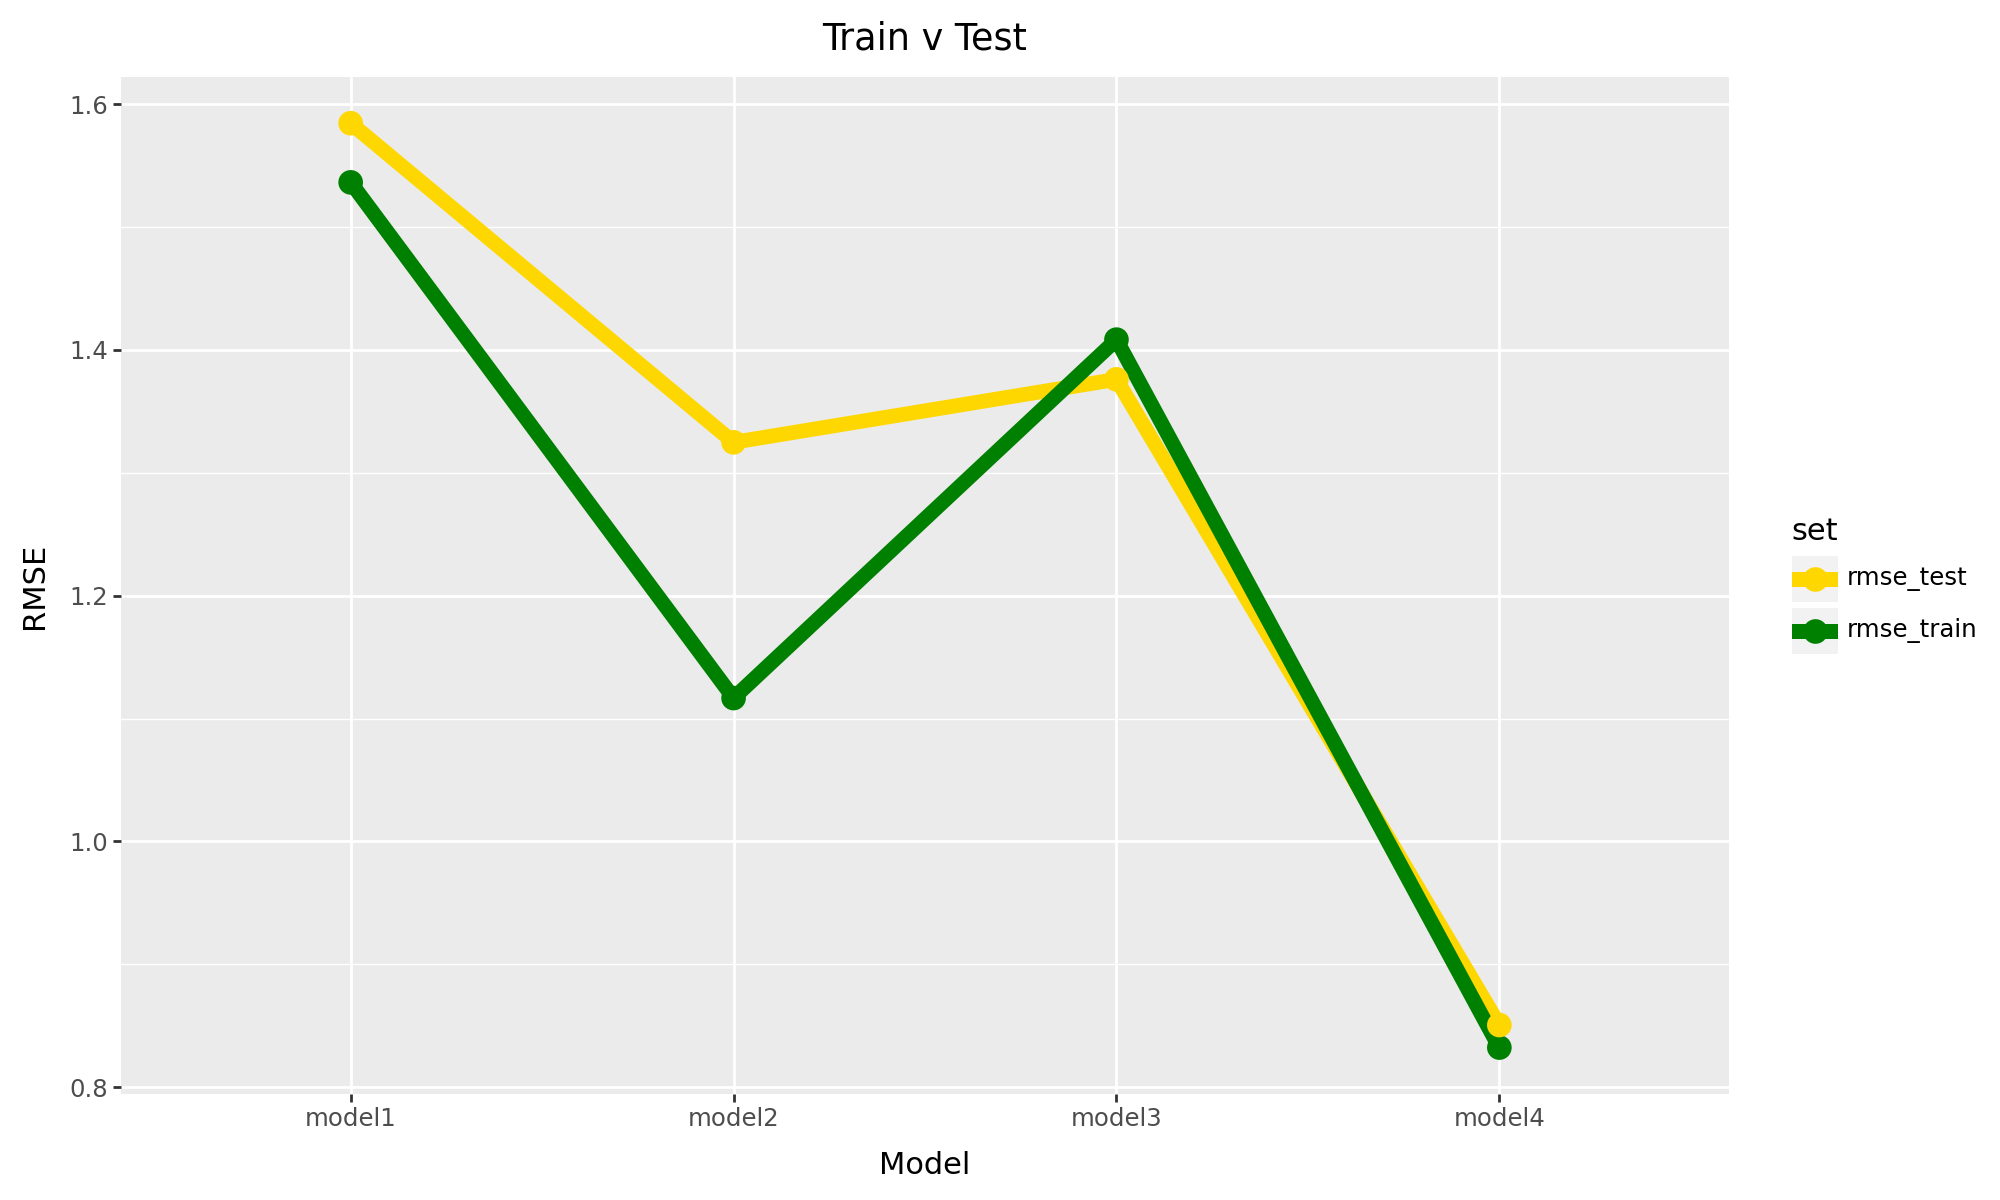

In [132]:
(ggplot(rmse_melted, aes(x='model', y='rmse', color='set', group="set"))
     + geom_line(size=3)
     + geom_point(size=4)
     + scale_color_manual(values={
         "rmse_train": "green",
         "rmse_test": "gold"
     })
     + labs(
         title="Train v Test",
         x='Model',
         y='RMSE')
     + theme(figure_size=(10,6)))